# The transfer function

__Analytic form of transfer function__. In certain cases the transfer function is available as an analytic expression. One common transfer function used for resistance temperature sensors (to be discussed in __Chapter 3__) is the Callendar– Van Duzen equation. It gives the resistance of the sensor at a temperature T as

                                    
$$R(T)=R_{0}(1+AT+BT^2+C(T-100)T^3) \enspace,$$

where the constants A, B, and C are determined by direct measurement of resistance for the specific material used in the sensor and $R_0$ is the temperature of the sensor at 0 ºC. Typical temperatures used for calibration are the oxygen point (-182.962 ºC; the equilibrium between liquid oxygen and its vapor), the triple point of water (0.01 ºC; the point of equilibrium temperature between ice, liquid water, and water vapor), the steam point (100 ºC; the equilibrium point between water and vapor), the zinc point (419.58 ºC; the equilibrium point between solid and liquid zinc), the silver point (961.93 ºC), and the gold point (1064.43 ºC), as well as others. Consider a platinum resistance sensor with a nominal resistance of 25 $\Omega $ at 0 C. To calibrate the sensor its resistance is measured at the oxygen point as 6.2 $\Omega $, at the steam point as 35.6 $\Omega $, and at the zinc point as 66.1 $\Omega $. Calculate the coefficients A, B, and C and plot the transfer function between  -200 ºC and 600  ºC.
 


### Solution ###

In order to obtain the sensor calibration, several measurements at different temperatures where taken:

1. 6.2 $\Omega $ at a temperature of  -182.962 ºC (oxygen point).

2. 35.6 $\Omega $  at a temperature of  100 ºC (steam point).

3. 66.1 $\Omega $ at a temperature of 419.58 ºC (zinc point)

Let's plot the points,

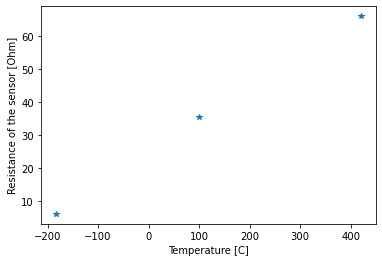

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, exp
%matplotlib inline
from scipy.interpolate import InterpolatedUnivariateSpline


T_exp = np.array([-182.962,100,419.58]);# Celcius
R_exp = np.array([6.2 ,35.6,66.1])# Ohm
plt.plot(T_exp,R_exp,'*');
plt.ylabel('Resistance of the sensor [Ohm]')
plt.xlabel('Temperature [C]')
plt.show()

Reordering the Callendar-Van Duzen equation we obtain the following

$$ AT+BT^2+C(T-100)T^3  =\frac{R(T)}{R_0}-1 \enspace,$$

which we can write in matrix form as $Mx=p$, where

$$\begin{bmatrix} T_1 & T_1^2 & (T_1-100)T_1^3 \\ T_2 & T_2^2 & (T_2-100)T_2^3 \\ T_3 & T_3^2 & (T_3-100)T_3^3\end{bmatrix} \begin{bmatrix} A\\ B \\ C\end{bmatrix}  = \begin{bmatrix} \frac{R(T_1)}{R_0}-1 \\ \frac{R(T_2)}{R_0}-1 \\ \frac{R(T_3)}{R_0}-1\end{bmatrix} \enspace.$$

Because $M$ is square we can solve by computing $M^{-1}$ directly.



In [2]:
R0=25;
M=np.array([[T_exp[0],(T_exp[0])**2,(T_exp[0]-100)*(T_exp[0])**3],[T_exp[1],(T_exp[1])**2,(T_exp[1]-100)*(T_exp[1])**3],[T_exp[2],(T_exp[2])**2,(T_exp[2]-100)*(T_exp[2])**3]]);
p=np.array([[(R_exp[0]/R0)-1],[(R_exp[1]/R0)-1],[(R_exp[2]/R0)-1]]);
x = np.linalg.solve(M,p) #solve linear equations system

np.set_printoptions(precision=3)

print('M')
print(M)
print('\n')
print('p')
print(p)
print('\n')
print('x')
print(x)

M
[[-1.830e+02  3.348e+04  1.733e+09]
 [ 1.000e+02  1.000e+04  0.000e+00]
 [ 4.196e+02  1.760e+05  2.361e+10]]


p
[[-0.752]
 [ 0.424]
 [ 1.644]]


x
[[ 4.160e-03]
 [ 8.031e-07]
 [-1.028e-11]]


We have found the coeffiecients $A$, $B$, and $C$ necessary to describe the sensor's transfer function. Now we plot it from -200 C a 600 C.

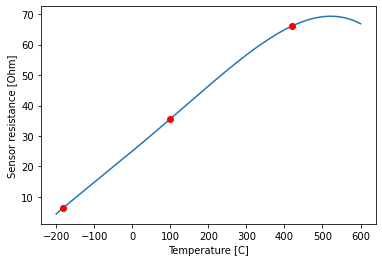

In [3]:
A=x[0];B=x[1];C=x[2];
T_range= np.arange(start = -200, stop = 601, step = 1);
R_funT= R0*(1+A[0]*T_range+B[0]*(T_range)**2+C[0]*(T_range-100)*(T_range)**3);
plt.plot(T_range,R_funT,T_exp[0],R_exp[0],'ro',T_exp[1],R_exp[1],'ro',T_exp[2],R_exp[2],'ro');
plt.ylabel('Sensor resistance [Ohm]')
plt.xlabel('Temperature [C]')
plt.show()


We see the fit is accurate. Note that our approach is also valid if we have more experimental points, in which case the system of equations $Mx=p$ is solved in the [Least-Squares sense.](http://math.mit.edu/~gs/linearalgebra/ila0403.pdf)

> This page was written in the [IPython Jupyter Notebook](https://jupyter.org/). To download the notebook click on this option at the top menu or get it from the [github repo](https://github.com/agmarrugo/sensors-actuators).